In [1]:
import matplotlib.pyplot as plt
from main import Racetrack, MC
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
env = Racetrack("track1.txt")
env.reset_episode()
track_shape = (env.max_y, env.max_x)
mc = MC(track_shape, 100_000)
mc.optimize(env)

1 644
2 14864
3 2142
4 4436
5 2787
6 15083
7 7706
8 1952
9 28671
10 6762
11 46857
12 22802
13 87123
14 27818
15 490
16 3539
17 8651
18 793
19 5215
20 470
21 1953
22 6169
23 33792
24 2844
25 6294
26 2124
27 729
28 630
29 6656
30 3721
31 2477
32 1492
33 1789
34 9314
35 11739
36 4375
37 884
38 497
39 2604
40 10520
41 2402
42 2827
43 153
44 411
45 5512
46 11892
47 2406
48 849
49 1561
50 2194
51 2302
52 13902
53 862
54 3935
55 88
56 566
57 2008
58 697
59 3663
60 297
61 2702
62 782
63 937
64 4778
65 163
66 4821
67 7006
68 2792
69 1778
70 186
71 3679
72 388
73 2813
74 64
75 7623
76 7205
77 3211
78 2530
79 5340
80 10158
81 1072
82 5035
83 3289
84 9964
85 635
86 1533
87 2807
88 5796
89 1107
90 123
91 3511
92 452
93 1056
94 3125
95 4811
96 7877
97 2709
98 3356
99 581
100 385
101 266
102 83
103 8991
104 5118
105 52
106 8659
107 2020
108 310
109 5310
110 1838
111 1724
112 459
113 1995
114 1045
115 391
116 6970
117 1981
118 5514
119 1268
120 530
121 1431
122 1350
123 6618
124 2464
125 125
126 1164


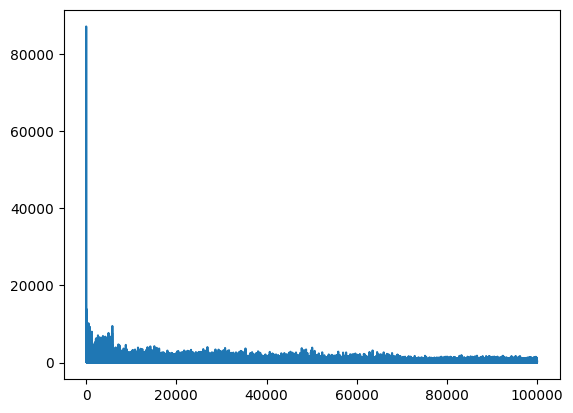

In [3]:
plt.plot(mc.trajectory_lengths)

In [68]:
import random
from main import State


env.reset_episode()
trajectory = []
while env.is_terminal is False:
    state = env.state
    y_pos, x_pos = state.pos_y, state.pos_x
    action_idx = np.flatnonzero(mc.q[:, y_pos, x_pos] == np.max(mc.q[:, y_pos, x_pos]))
    action_idx = random.choice(action_idx)

    env._action(action_idx, False)
    # update position based on velocity components
    new_state = State(env.state.pos_x + env.state.vel_x, env.state.pos_y - env.state.vel_y, env.state.vel_x, env.state.vel_y)

    # validate if crossed border
    # first move car on y component then on x
    inc_y, inc_x = 0, 0

    while True:
        y, x = env.state.pos_y - inc_y, env.state.pos_x + inc_x

        if (y, x) in env.border_idx:
            env._reset_position()
            break
        if inc_y > inc_x and inc_x != env.state.vel_x:
            inc_x += 1
        elif inc_y < env.state.vel_y:
            inc_y += 1
        else:
            inc_x += 1
        if y == new_state.pos_y and x == new_state.pos_x:
            break

    env.state = new_state

    # validate if hit a border
    if (env.state.pos_y, env.state.pos_x) in env.border_idx:
        env._reset_position()

    # validate if outside of track (matrix dimensions)
    if env.state.pos_y < 0 or env.state.pos_y > env.max_y or env.state.pos_x < 0 or env.state.pos_x > env.max_x:
        env._reset_position()

    # validate if at finish line
    if (env.state.pos_y, env.state.pos_x) in env.finish_idx:
        env.is_terminal = True
        new_state, reward = env.state, 0
    else:
        new_state, reward = env.state, -1

    trajectory.append([state, action_idx, reward, new_state])

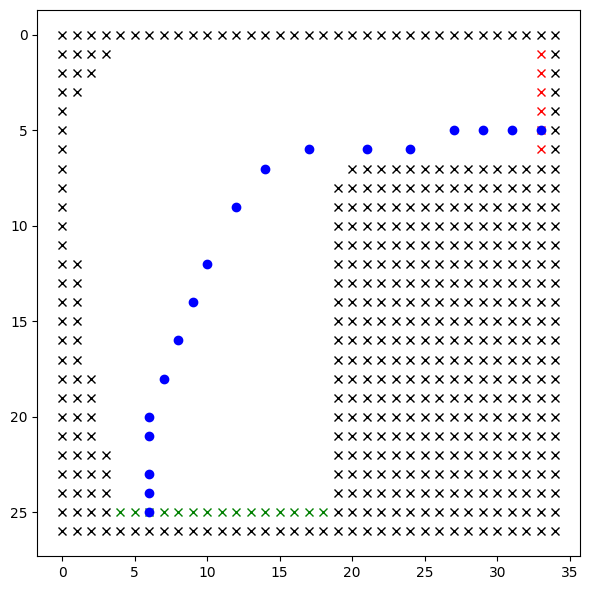

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i, j in env.start_idx:
    ax.plot(j, i, "xg")

for i, j in env.finish_idx:
    ax.plot(j, i, "xr")

for i, j in env.border_idx:
    ax.plot(j, i, "xk")

for state, a, r, new_state in trajectory:
    ax.plot(state.pos_x, state.pos_y, "ob")

ax.plot(trajectory[-1][-1].pos_x, trajectory[-1][-1].pos_y, "ob")

# ax.set_xlim([-1, env.max_y + 1]), ax.set_ylim([-1, env.max_x + 1])
ax.invert_yaxis()
fig.tight_layout()